<a href="https://colab.research.google.com/github/carmencb4/DA/blob/main/Kopie_van_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

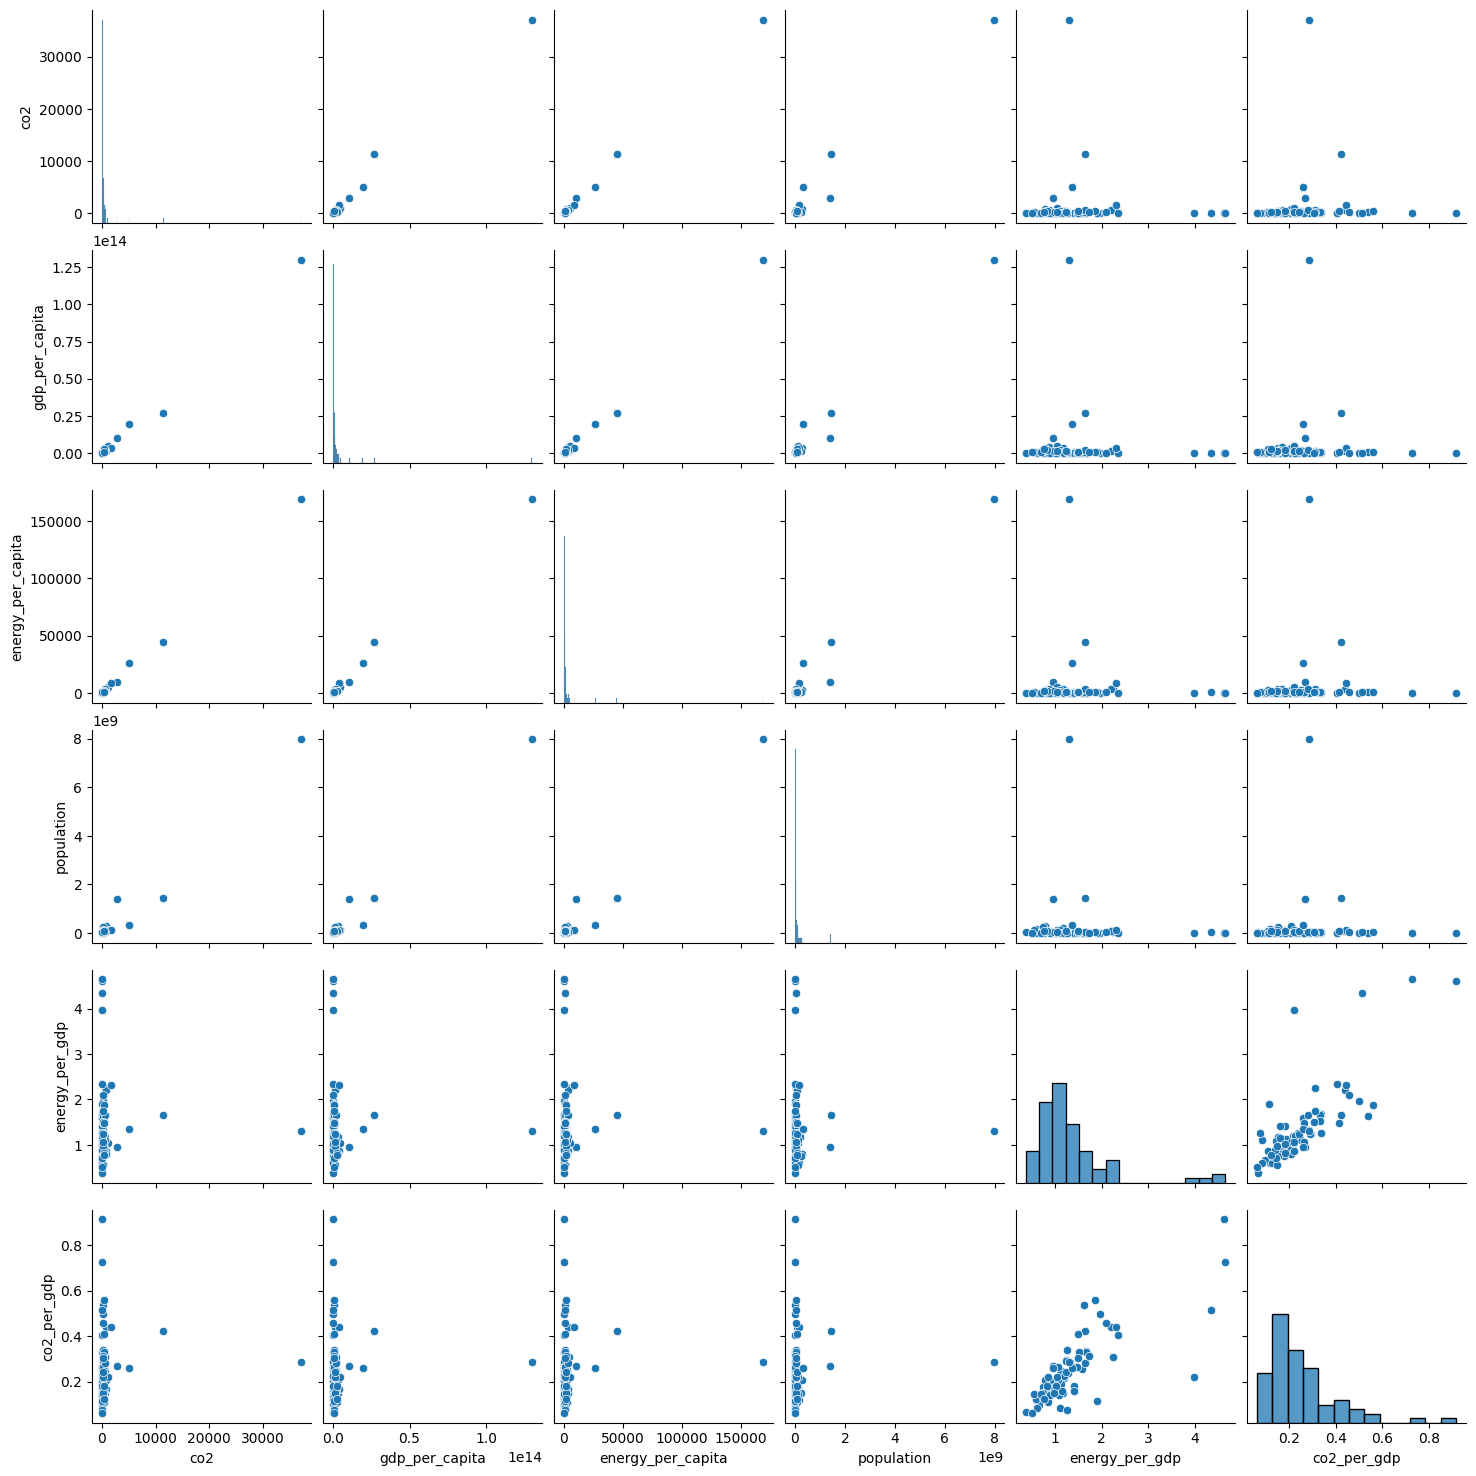

Mean Squared Error: 300426.84710357146
R-squared: 0.9599425323208488
                    Coefficient
gdp_per_capita     7.644173e-12
energy_per_capita  1.760765e-01
population         8.072401e-07
energy_per_gdp    -3.467643e+01
co2_per_gdp        3.637489e+02
The biggest predictor of CO2 output is: co2_per_gdp


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
url = 'https://github.com/owid/co2-data/raw/master/owid-co2-data.csv'
df = pd.read_csv(url)

# Step 2: Inspect the columns to verify available data
print(df.columns)

# Step 3: Data Preprocessing
# Select relevant columns
# Adjust the columns based on the actual column names in the dataset
columns = ['country', 'year', 'co2_per_capita', 'gdp', 'primary_energy_consumption', 'population', 'co2', 'energy_per_gdp', 'co2_per_gdp']
df = df[columns]

# Rename columns if necessary to match expected names
df.rename(columns={
    'gdp': 'gdp_per_capita',
    'primary_energy_consumption': 'energy_per_capita'
}, inplace=True)

# Drop rows with missing values
df = df.dropna()

# Use data from a recent year for the analysis
recent_year = df['year'].max()
df_recent = df[df['year'] == recent_year]

# Step 4: Exploratory Data Analysis
# Pairplot to visualize relationships
sns.pairplot(df_recent[['co2', 'gdp_per_capita', 'energy_per_capita', 'population', 'energy_per_gdp', 'co2_per_gdp']])
plt.show()

# Step 5: Statistical Analysis and Modeling
# Define predictors and target variable
X = df_recent[['gdp_per_capita', 'energy_per_capita', 'population', 'energy_per_gdp', 'co2_per_gdp']]
y = df_recent['co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Step 6: Identify the biggest predictor
biggest_predictor = coefficients['Coefficient'].abs().idxmax()
print(f'The biggest predictor of CO2 output is: {biggest_predictor}')


Question 2

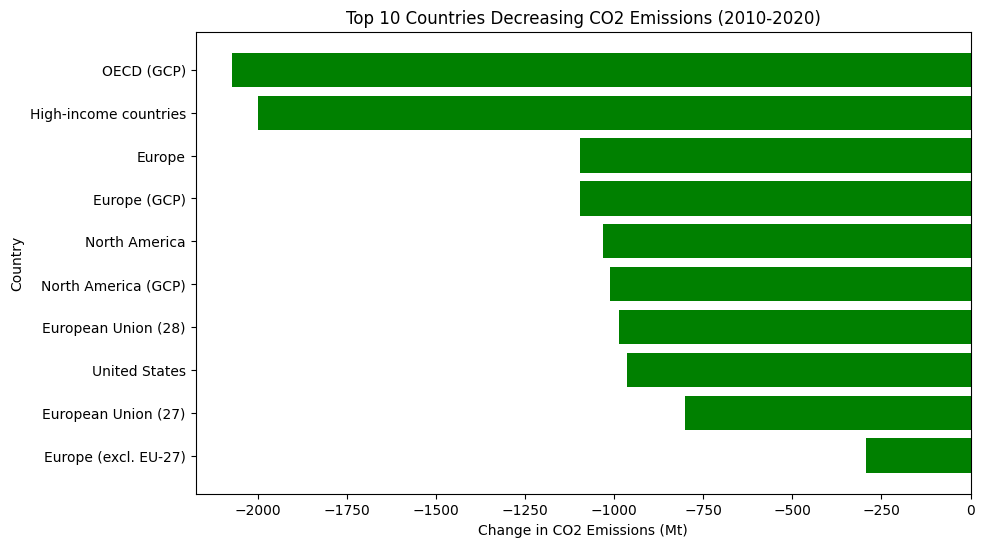

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Select relevant columns
df = df[['country', 'year', 'co2']]

# Drop rows with missing values
df.dropna(inplace=True)

# Define the period for analysis
start_year = 2010
end_year = 2020

# Filter the dataframe for the selected period
df_period = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

# Pivot the dataframe to have years as columns
df_pivot = df_period.pivot(index='country', columns='year', values='co2')

# Calculate the change in CO2 emissions over the period
df_pivot['change'] = df_pivot[end_year] - df_pivot[start_year]

# Sort the dataframe by the change in CO2 emissions
df_pivot = df_pivot.sort_values(by='change')

# Select the top 10 countries with the largest decreases in CO2 emissions
top_decreasing_countries = df_pivot.head(10)

# Plot the top decreasing countries
plt.figure(figsize=(10, 6))
plt.barh(top_decreasing_countries.index, top_decreasing_countries['change'], color='green')
plt.xlabel('Change in CO2 Emissions (Mt)')
plt.ylabel('Country')
plt.title('Top 10 Countries Decreasing CO2 Emissions (2010-2020)')
plt.gca().invert_yaxis()
plt.show()


Question 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

# Inspect the columns of the dataframe to identify the correct names
print(df.columns)

# Display first few rows to understand data structure
print(df.head())

# Assuming the columns we need are 'year', 'technology', and 'cost_per_mwh'
# Adjust column names based on actual dataset
# Replace 'technology' and 'cost_per_mwh' with the correct column names

# Check if the dataset has columns for technology and cost per MWh
if 'technology' in df.columns and 'cost_per_mwh' in df.columns:
    # Filter relevant columns
    df_filtered = df[['year', 'technology', 'cost_per_mwh']].dropna()

    # Check unique values in 'technology' column to ensure correct filtering
    print(df_filtered['technology'].unique())

    # Filter data for each technology
    df_solar = df_filtered[df_filtered['technology'] == 'Solar']
    df_wind = df_filtered[df_filtered['technology'] == 'Wind']
    df_hydro = df_filtered[df_filtered['technology'] == 'Hydro']

    # Calculate annual average cost for each technology
    avg_solar_cost = df_solar.groupby('year')['cost_per_mwh'].mean()
    avg_wind_cost = df_wind.groupby('year')['cost_per_mwh'].mean()
    avg_hydro_cost = df_hydro.groupby('year')['cost_per_mwh'].mean()

    # Plot cost trends
    plt.figure(figsize=(10, 6))

    plt.plot(avg_solar_cost.index, avg_solar_cost.values, label='Solar')
    plt.plot(avg_wind_cost.index, avg_wind_cost.values, label='Wind')
    plt.plot(avg_hydro_cost.index, avg_hydro_cost.values, label='Hydro')

    plt.xlabel('Year')
    plt.ylabel('Cost ($/MWh)')
    plt.title('Cost Trends of Renewable Energy Technologies')
    plt.legend()
    plt.grid(True)
    plt.show()


Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biof

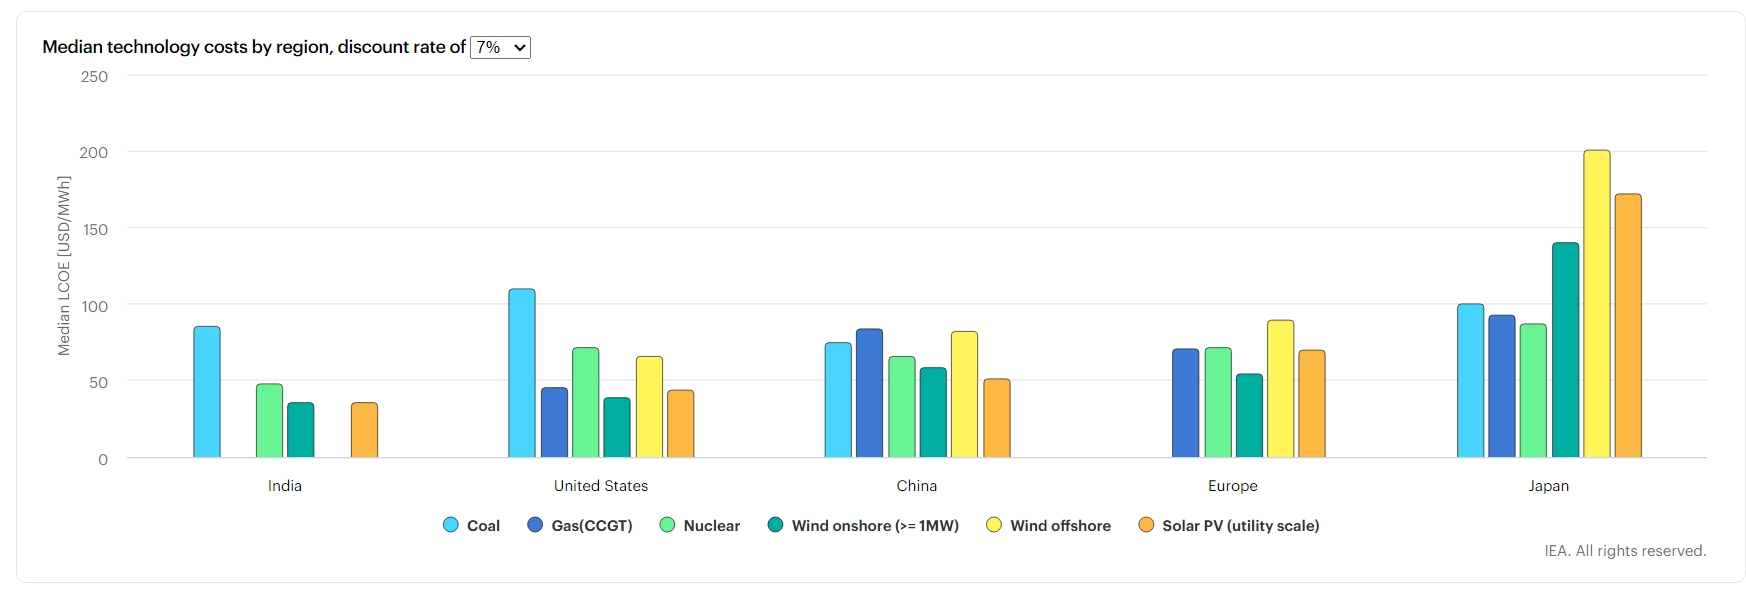